# Exploratory Data Analysis (EDA)

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [3]:
# Loading the dataset

data = pd.read_csv('solarpowergeneration.csv')
data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [4]:
# Display the first few rows of the dataset

data.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
# Checking the dataset's structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
# Converting the data type of the "sky-cover" column to "category".
# This is useful for optimizing memory and signaling that the column contains categorical data rather than numerical values.
data = data.astype({"sky-cover": "category"})

# Displaying the updated data types of each column to confirm that the conversion was successful.
data.dtypes

distance-to-solar-noon          float64
temperature                       int64
wind-direction                    int64
wind-speed                      float64
sky-cover                      category
visibility                      float64
humidity                          int64
average-wind-speed-(period)     float64
average-pressure-(period)       float64
power-generated                   int64
dtype: object

In [7]:
# Checking for missing values

data.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
# Checking for duplicate rows in the DataFrame.

data.duplicated().sum()

0

In [9]:
# Basic statistics of numerical variables

data.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,10.000000,100.000000,40.000000,30.530000,36580.000000


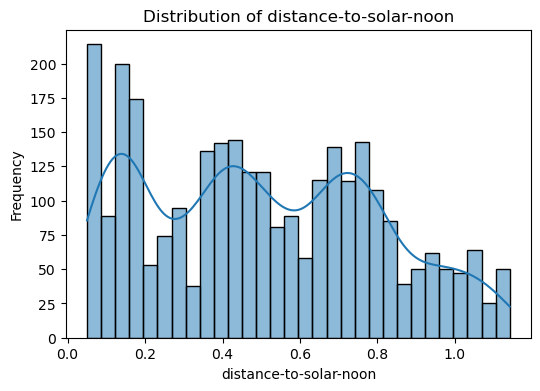

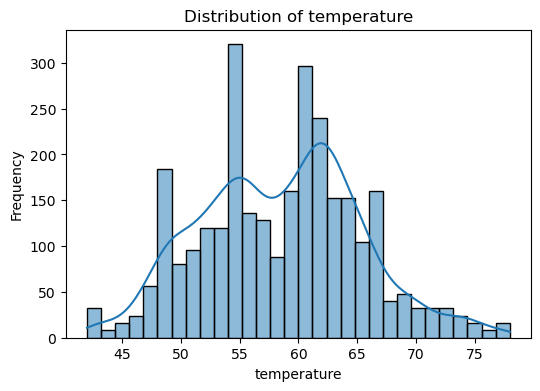

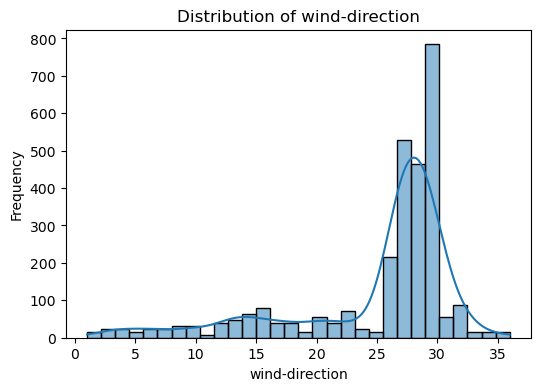

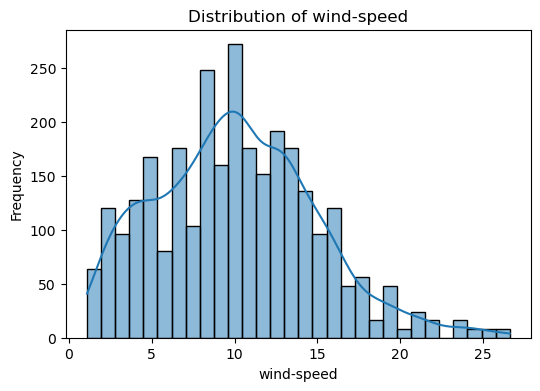

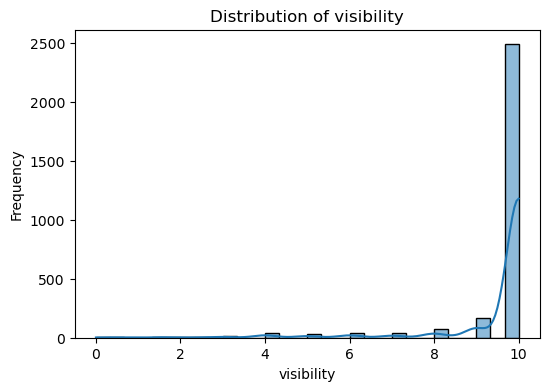

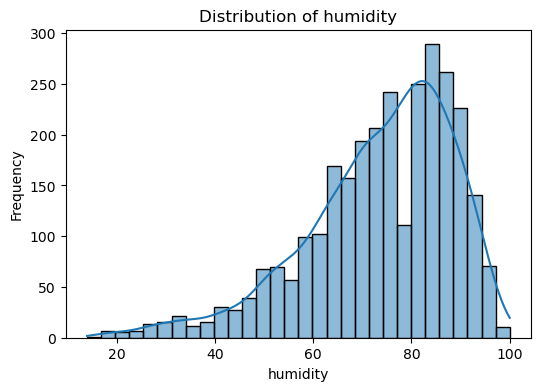

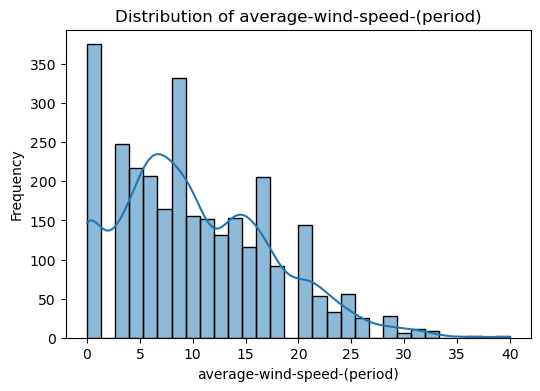

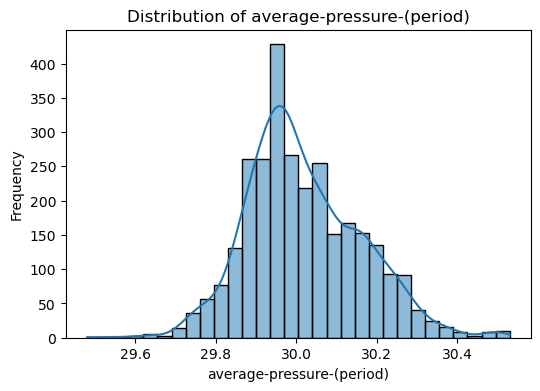

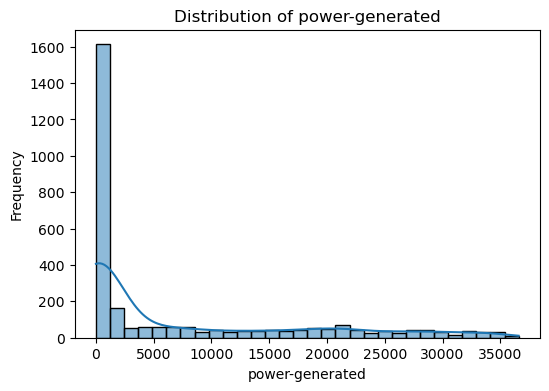

In [10]:
# Visualizing distributions of numerical variables

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

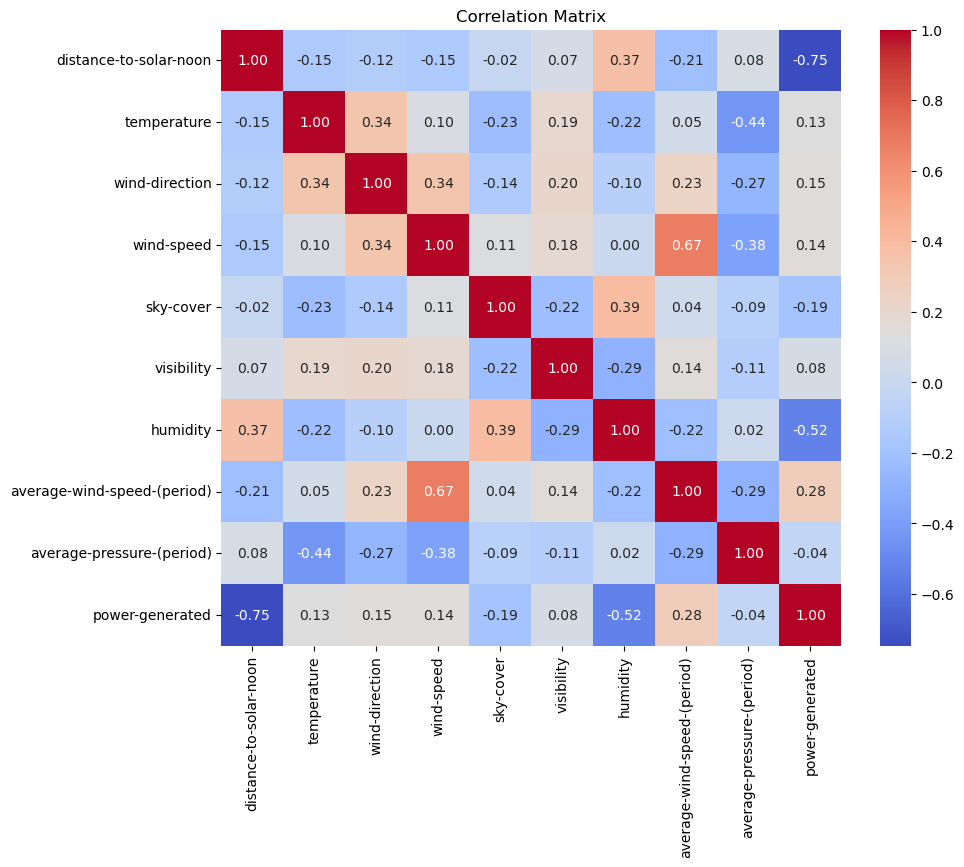

In [11]:
# Visualizing correlation between numerical variables

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

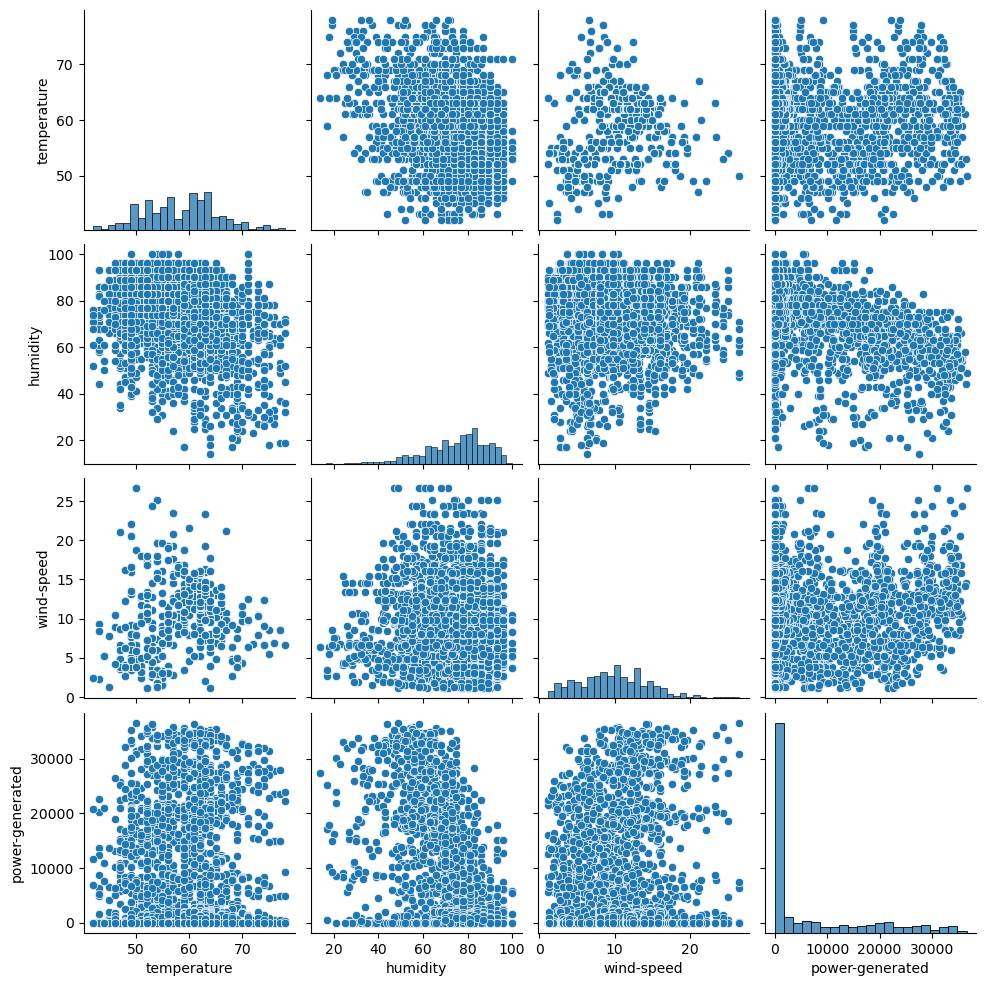

In [12]:
# Pairplot of selected features

selected_features = ['temperature', 'humidity', 'wind-speed', 'power-generated']
sns.pairplot(data[selected_features])
plt.show()

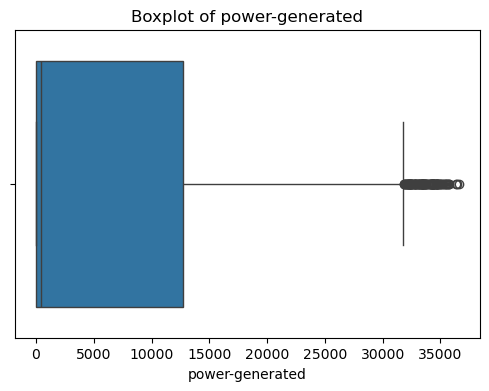

In [13]:
# Visualizing target variable (power-generated)

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['power-generated'])
plt.title('Boxplot of power-generated')
plt.xlabel('power-generated')
plt.show()

In [14]:
# Step 1: Select numerical columns from the DataFrame (columns with float64 or int64 data types).
# The select_dtypes method is used to filter numerical columns from the DataFrame.
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Initialize an empty dictionary to store the count of outliers for each numerical column.
outliers_dict = {}

# Step 2: Loop through each numerical column to calculate outliers.
for col in numerical_columns:
    # Calculate the first quartile (Q1), which is the 25th percentile of the column.
    Q1 = np.percentile(data[col], 25)

    # Calculate the third quartile (Q3), which is the 75th percentile of the column.
    Q3 = np.percentile(data[col], 75)

    # Step 3: Compute the Interquartile Range (IQR) as the difference between Q3 and Q1.
    IQR = Q3 - Q1

    # Step 4: Determine the lower and upper bounds for identifying outliers.
    # Values outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 5: Identify the outliers by filtering rows that fall outside the defined bounds.
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Step 6: Count the number of outliers in the column.
    outliers_count = len(outliers)

    # Store the count of outliers for the column in the outliers_dict dictionary.
    outliers_dict[col] = outliers_count
# print the results for each column, including Q1, Q3, IQR, bounds, and the number of outliers.
    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}") 
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Count: {outliers_count}")
    print("-" * 50)

# Calculate the total number of outliers across all numerical columns by summing the outliers counts.
total_outliers = sum(outliers_dict.values())
total_outliers


Column: distance-to-solar-noon
Q1: 0.24371397625
Q3: 0.739527509
IQR: 0.49581353274999995
Lower Bound: -0.5000063228749999
Upper Bound: 1.4832478081249998
Outliers Count: 0
--------------------------------------------------
Column: temperature
Q1: 53.0
Q3: 63.0
IQR: 10.0
Lower Bound: 38.0
Upper Bound: 78.0
Outliers Count: 0
--------------------------------------------------
Column: wind-direction
Q1: 25.0
Q3: 29.0
IQR: 4.0
Lower Bound: 19.0
Upper Bound: 35.0
Outliers Count: 528
--------------------------------------------------
Column: wind-speed
Q1: 6.6
Q3: 13.1
IQR: 6.5
Lower Bound: -3.1500000000000004
Upper Bound: 22.85
Outliers Count: 40
--------------------------------------------------
Column: visibility
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower Bound: 10.0
Upper Bound: 10.0
Outliers Count: 429
--------------------------------------------------
Column: humidity
Q1: 65.0
Q3: 84.0
IQR: 19.0
Lower Bound: 36.5
Upper Bound: 112.5
Outliers Count: 83
---------------------------------------------

1218

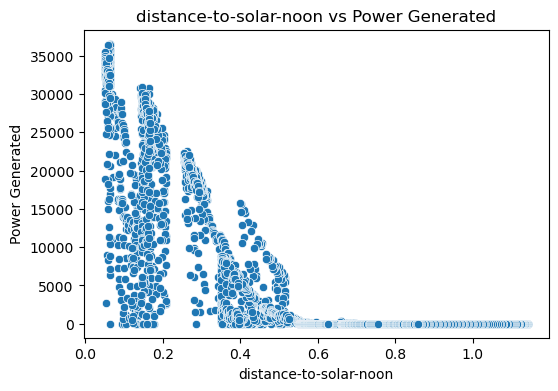

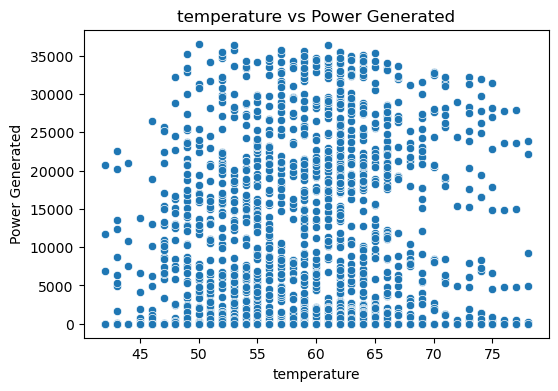

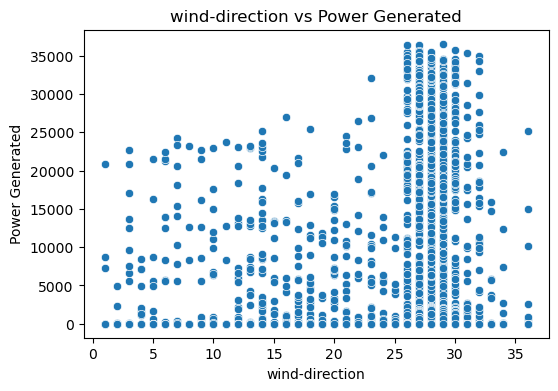

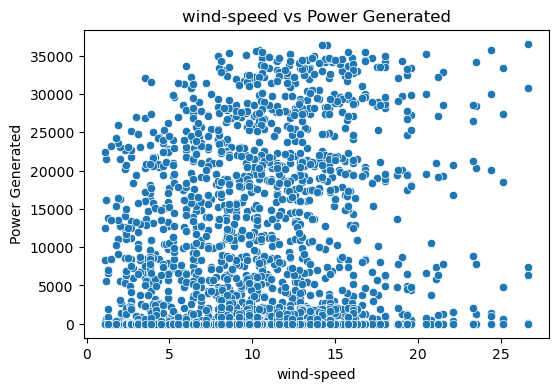

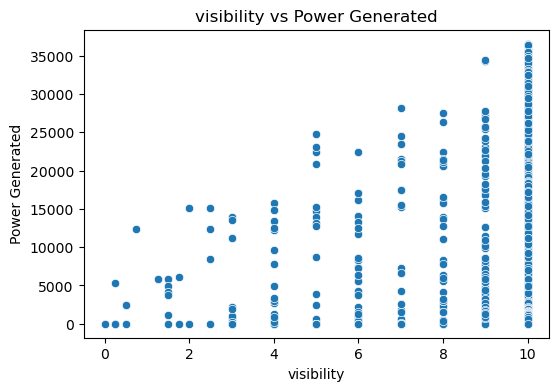

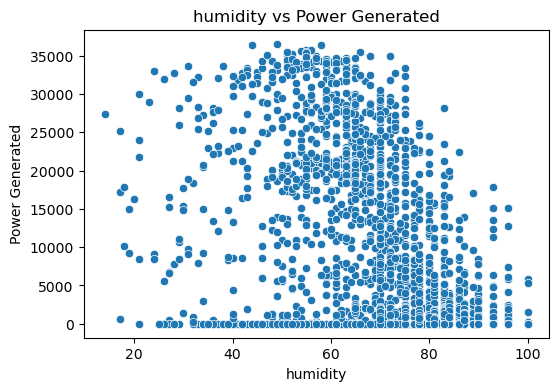

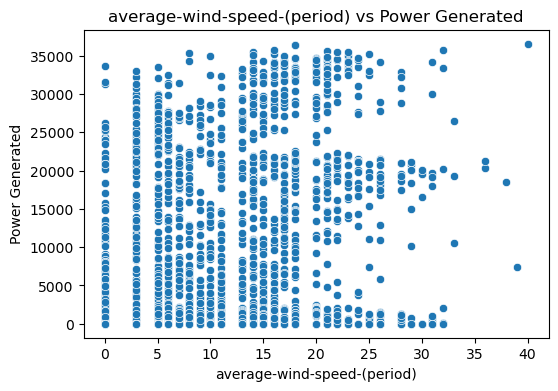

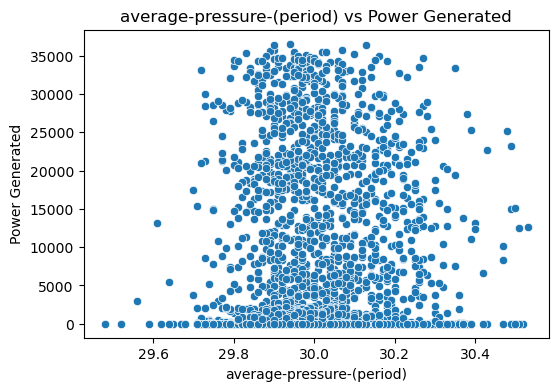

In [15]:
# Checking relationships with target variable

for col in numerical_columns:
    if col != 'power-generated':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[col], y=data['power-generated'])
        plt.title(f'{col} vs Power Generated')
        plt.xlabel(col)
        plt.ylabel('Power Generated')
        plt.show()

In [16]:
# Handling missing values (if any)

missing_columns = data.columns[data.isnull().any()]
for col in missing_columns:
    # Replace missing values with the mean (or use a different strategy as needed)
    data[col].fillna(data[col].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5964\2538965167.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [17]:
# Checking for skewness

skewed_features = data[numerical_columns].skew()
skewed_features

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623017
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64

In [18]:
# Splitting features and target variable

X = data.drop(columns=['temperature'])  
X 

,distance-to-solar-noon,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...
2915,0.166453,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,27,13.9,2,10.0,81,17.0,29.87,677


In [19]:
y = data['temperature']
y

0       69
1       69
2       69
3       69
4       69
        ..
2915    63
2916    63
2917    63
2918    63
2919    63
Name: temperature, Length: 2920, dtype: int64

In [20]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      distance-to-solar-noon  wind-direction  wind-speed sky-cover  \
 2651                0.160000              27        13.6         1   
 1709                0.298292              27        25.1         2   
 869                 0.511344              20         8.7         4   
 2355                0.148816              29        10.7         0   
 2915                0.166453              27        13.9         4   
 ...                      ...             ...         ...       ...   
 1638                0.546685              27        10.7         2   
 1095                1.084602              13         3.2         0   
 1130                0.436455              13         1.5         1   
 1294                0.715856              29        16.2         1   
 860                 0.198953              29         8.4         1   
 
       visibility  humidity  average-wind-speed-(period)  \
 2651        10.0        68                         14.0   
 1709        10.0        6

In [21]:
# Dummification for categorical variables (if any)

from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Initialize OneHotEncoder with updated parameter
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'sparse_output' instead of 'sparse'

if not categorical_columns.empty:
    # Apply encoding to training and testing data
    X_encoded = pd.DataFrame(
        encoder.fit_transform(X_train[categorical_columns]),
        columns=encoder.get_feature_names_out(categorical_columns)
    )
    X_train = pd.concat([X_train.drop(columns=categorical_columns), X_encoded], axis=1)

    X_encoded_test = pd.DataFrame(
        encoder.transform(X_test[categorical_columns]),
        columns=encoder.get_feature_names_out(categorical_columns)
    )
    X_test = pd.concat([X_test.drop(columns=categorical_columns), X_encoded_test], axis=1)

print("Categorical encoding completed successfully.")

Categorical encoding completed successfully.


In [22]:
# Standardization

scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-1.14325278,  0.30478885,  0.73499635, ...,         nan,
                nan,         nan],
       [-0.68232956,  0.30478885,  3.1331189 , ...,  2.3200245 ,
        -0.50120369, -0.51786751],
       [ 0.02776829, -0.70003116, -0.28681239, ..., -0.43102993,
        -0.50120369,  1.93099584],
       ...,
       [        nan,         nan,         nan, ..., -0.43102993,
        -0.50120369, -0.51786751],
       [        nan,         nan,         nan, ..., -0.43102993,
        -0.50120369, -0.51786751],
       [        nan,         nan,         nan, ..., -0.43102993,
        -0.50120369, -0.51786751]])

In [24]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.8234681 ,  0.59188028,  0.46390424, ...,         nan,
                nan,         nan],
       [-0.14434309,  0.30478885,  1.19376762, ...,         nan,
                nan,         nan],
       [ 0.53293065,  0.59188028,  0.13025241, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ..., -0.43102993,
         1.99519679, -0.51786751],
       [        nan,         nan,         nan, ..., -0.43102993,
        -0.50120369, -0.51786751],
       [        nan,         nan,         nan, ..., -0.43102993,
        -0.50120369, -0.51786751]])

In [25]:
!pip install joblib

In [26]:
# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


In [27]:
# Importing libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


In [28]:
# Step 1: Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [29]:
# Dictionary to store the results
results = {}

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'KNN Regression': KNeighborsRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(random_state=42)
}

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
imputer

SimpleImputer()

In [31]:
X_train = imputer.fit_transform(X_train)
X_train

array([[ 0.16      , 27.        , 13.6       , ...,  0.15667808,
         0.20077055,  0.2114726 ],
       [ 0.29829172, 27.        , 25.1       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5113438 , 20.        ,  8.7       , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.50301243, 24.87671233, 10.07538527, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50301243, 24.87671233, 10.07538527, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50301243, 24.87671233, 10.07538527, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2793, 12)
y_train shape: (2336,)
X_test shape: (1034, 12)
y_test shape: (584,)


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 


(      distance-to-solar-noon  wind-direction  wind-speed sky-cover  \
 2651                0.160000              27        13.6         1   
 1709                0.298292              27        25.1         2   
 869                 0.511344              20         8.7         4   
 2355                0.148816              29        10.7         0   
 2915                0.166453              27        13.9         4   
 ...                      ...             ...         ...       ...   
 1638                0.546685              27        10.7         2   
 1095                1.084602              13         3.2         0   
 1130                0.436455              13         1.5         1   
 1294                0.715856              29        16.2         1   
 860                 0.198953              29         8.4         1   
 
       visibility  humidity  average-wind-speed-(period)  \
 2651        10.0        68                         14.0   
 1709        10.0        6

In [47]:
# Truncate larger dataset to match the smaller one
min_size = min(len(X_train), len(y_train))
min_size 

2336

In [51]:
X_train = X_train[:min_size]
X_train

,distance-to-solar-noon,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2651,0.160000,27,13.6,1,10.0,68,14.0,29.88,10750
1709,0.298292,27,25.1,2,10.0,64,38.0,29.89,18575
869,0.511344,20,8.7,4,10.0,69,11.0,30.14,3407
2355,0.148816,29,10.7,0,10.0,70,5.0,29.83,29010
2915,0.166453,27,13.9,4,10.0,75,10.0,29.93,6995
...,...,...,...,...,...,...,...,...,...
1638,0.546685,27,10.7,2,10.0,80,22.0,30.17,445
1095,1.084602,13,3.2,0,10.0,59,3.0,30.15,0
1130,0.436455,13,1.5,1,10.0,86,0.0,30.15,207
1294,0.715856,29,16.2,1,10.0,68,21.0,30.04,0


In [49]:
y_train = y_train[:min_size]
y_train 

2651    65
1709    54
869     47
2355    67
2915    63
        ..
1638    52
1095    56
1130    55
1294    48
860     43
Name: temperature, Length: 2336, dtype: int64

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate each model
for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Store the results
        results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}
        print(f'{name} - MSE: {mse}, MAE: {mae}, R-squared: {r2}')
    except ValueError as e:
        print(f'Error with {name}: {e}')

Linear Regression - MSE: 33.036454922410336, MAE: 4.492447161441028, R-squared: 0.29310479298264625
Ridge Regression - MSE: 33.04563014583576, MAE: 4.497515697234158, R-squared: 0.2929084667885077
Lasso Regression - MSE: 40.82493573438579, MAE: 5.156364718635083, R-squared: 0.126451325809408
Elastic Net Regression - MSE: 40.689599977013344, MAE: 5.138242713184016, R-squared: 0.12934716310337113
Decision Tree Regression - MSE: 23.470890410958905, MAE: 2.344178082191781, R-squared: 0.49778328289451024
Random Forest Regression - MSE: 11.832772602739723, MAE: 2.2452739726027393, R-squared: 0.7468090853498668
Gradient Boosting Regression - MSE: 17.988295625146492, MAE: 3.145142798985982, R-squared: 0.6150967169542917
Support Vector Regression - MSE: 45.54984442166753, MAE: 5.546752259158252, R-squared: 0.025350426439953777
KNN Regression - MSE: 42.25917808219178, MAE: 5.082876712328766, R-squared: 0.09576222663861234
Error with XGBoost Regression: DataFrame.dtypes for data must be int, floa

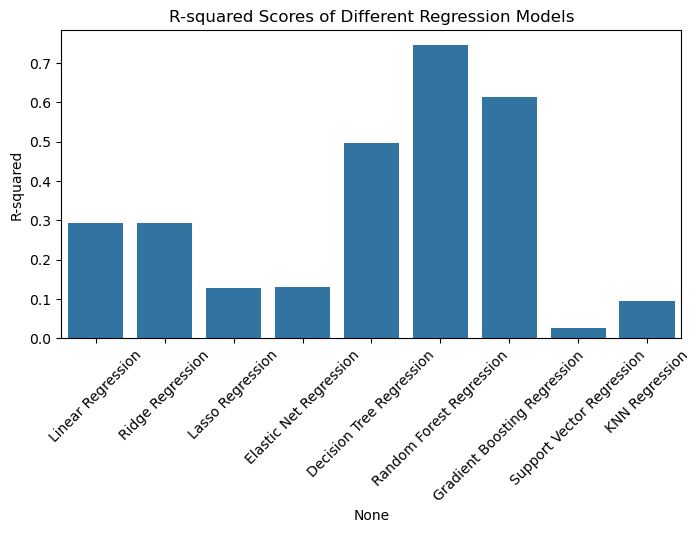

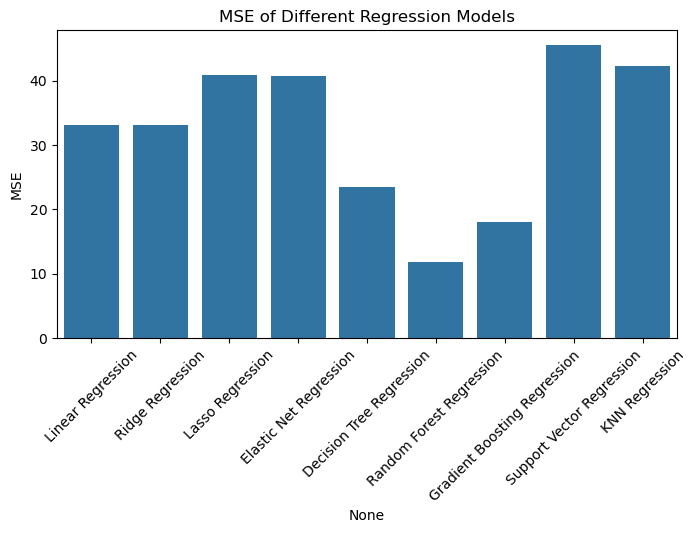

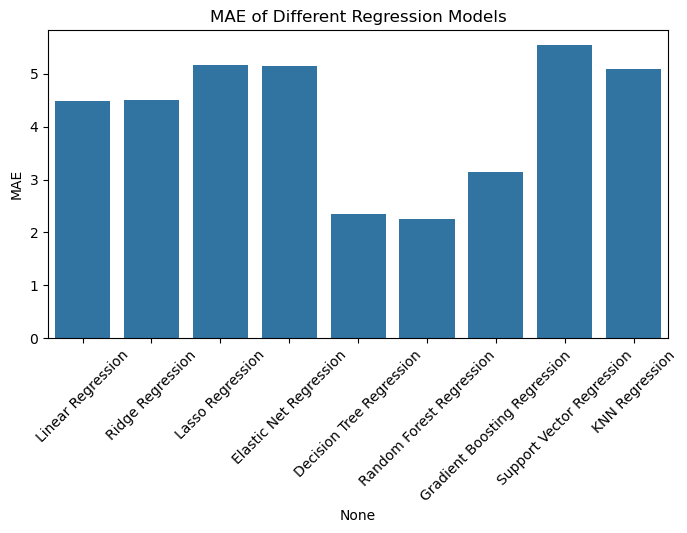

In [55]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting the results
plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='R-squared', data=results_df)
plt.title('R-squared Scores of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('MSE of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='MAE', data=results_df)
plt.title('MAE of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Suppose we have results stored in a DataFrame `results_df`
best_model = results_df['R-squared'].idxmax()  # Model with highest R-squared
best_model_metrics = results_df.loc[best_model]  # Metrics for the best model

print(f"Best Model: {best_model}")
print(f"R-squared: {best_model_metrics['R-squared']}")
print(f"MSE: {best_model_metrics['MSE']}")
print(f"MAE: {best_model_metrics['MAE']}")

Best Model: Random Forest Regression
R-squared: 0.7468090853498668
MSE: 11.832772602739723
MAE: 2.2452739726027393


In [59]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assume X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save both the model and the scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']